**Обнаружение статистически значимых отличий в уровнях экспрессии генов больных раком**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

В этом задании вы:

вспомните, что такое t-критерий Стьюдента и для чего он применяется

сможете применить технику множественной проверки гипотез и увидеть собственными глазами, как она работает на реальных данных

почувствуете разницу в результатах применения различных методов поправки на множественную проверку

**Описание используемых данных**

Данные для этой задачи взяты из исследования, проведенного в Stanford School of Medicine. В исследовании была предпринята попытка выявить набор генов, которые позволили бы более точно диагностировать возникновение рака груди на самых ранних стадиях.

В эксперименте принимали участие 24 человек, у которых не было рака груди (normal), 25 человек, у которых это заболевание было диагностировано на ранней стадии (early neoplasia), и 23 человека с сильно выраженными симптомами (cancer).

Ученые провели секвенирование биологического материала испытуемых, чтобы понять, какие из этих генов наиболее активны в клетках больных людей.

Секвенирование — это определение степени активности генов в анализируемом образце с помощью подсчёта количества соответствующей каждому гену РНК.

В данных для этого задания вы найдете именно эту количественную меру активности каждого из 15748 генов у каждого из 72 человек, принимавших участие в эксперименте.

Вам нужно будет определить те гены, активность которых у людей в разных стадиях заболевания отличается статистически значимо.

Кроме того, вам нужно будет оценить не только статистическую, но и практическую значимость этих результатов, которая часто используется в подобных исследованиях.

Диагноз человека содержится в столбце под названием "Diagnosis".

**Практическая значимость изменения**

Цель исследований — найти гены, средняя экспрессия которых отличается не только статистически значимо, но и достаточно сильно. В экспрессионных исследованиях для этого часто используется метрика, которая называется fold change (кратность изменения). Определяется она следующим образом:

Fc(C,T)=T/C при T>C и -С/T при T<C,

где C,T — средние значения экспрессии гена в control и treatment группах соответственно. По сути, fold change показывает, во сколько раз отличаются средние двух выборок.

**Часть 1**

применение t-критерия Стьюдента

В первой части вам нужно будет применить критерий Стьюдента для проверки гипотезы о равенстве средних в двух независимых выборках. Применить критерий для каждого гена нужно будет дважды:

для групп normal (control) и early neoplasia (treatment)

для групп early neoplasia (control) и cancer (treatment)

В качестве ответа в этой части задания необходимо указать количество статистически значимых отличий, которые вы нашли с помощью t-критерия Стьюдента, то есть число генов, у которых p-value этого теста оказался меньше, чем уровень значимости.

In [3]:
from scipy import stats

In [4]:
data=pd.read_csv('gene_high_throughput_sequencing.csv')

In [5]:
data.shape

(72, 15750)

In [6]:
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [7]:
types, cnts = np.unique(data.Diagnosis.values, return_counts=True)

In [8]:
types

array(['cancer', 'early neoplasia', 'normal'], dtype=object)

In [9]:
import seaborn as sns

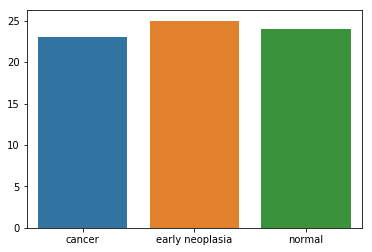

In [10]:
sns.barplot(types, cnts)

In [12]:
control=data[data.Diagnosis=='normal']
neoplasia=data[data.Diagnosis=='early neoplasia']
cancer=data[data.Diagnosis=='cancer']

Критерий Шапиро-Уилка:

 $H_0\colon$ распредлены нормально
 
 $H_1\colon$ не нормально.

In [13]:
columns=data.drop(['Patient_id','Diagnosis'],axis=1)

In [14]:
control1=control.drop(['Patient_id','Diagnosis'],axis=1)
neoplasia1=neoplasia.drop(['Patient_id','Diagnosis'],axis=1)
cancer1=cancer.drop(['Patient_id','Diagnosis'],axis=1)

In [19]:
for i in columns:
    print(i, stats.shapiro(control1[i])[1])
    

LOC643837 0.017408009618520737
LOC100130417 4.198354872642085e-06
SAMD11 2.169925210182555e-05
NOC2L 0.06026565656065941
KLHL17 0.018843743950128555
PLEKHN1 0.09533894807100296
C1orf170 0.4772849977016449
HES4 0.3936017155647278
ISG15 0.29715099930763245
AGRN 0.00013145446428097785
C1orf159 0.00012221939687151462
LOC254099 0.19391660392284393
TTLL10 0.08392523974180222
TNFRSF18 0.003398581175133586
TNFRSF4 0.36894863843917847
SDF4 0.32699087262153625
B3GALT6 0.3408649265766144
FAM132A 0.37713730335235596
UBE2J2 0.9981549978256226
SCNN1D 0.8522478938102722
ACAP3 0.0030878065153956413
PUSL1 0.25470876693725586
CPSF3L 0.8022365570068359
GLTPD1 0.8235599994659424
DVL1 0.36918410658836365
MXRA8 0.5897356867790222
AURKAIP1 0.29263412952423096
CCNL2 0.14261625707149506
LOC148413 0.001438792678527534
MRPL20 0.05380898341536522
LOC441869 0.1912635862827301
VWA1 0.562251627445221
ATAD3C 0.057481810450553894
ATAD3B 0.12461342662572861
ATAD3A 0.5000426769256592
C1orf70 0.4901507496833801
SSU72 0.7

GNG12 0.09171213954687119
DIRAS3 2.9169293611630565e-06
WLS 0.616673469543457
DEPDC1 0.000476959248771891
PIN1P1 0.8131046295166016
LRRC40 0.4093739092350006
SRSF11 0.4613687992095947
ANKRD13C 0.7273205518722534
HHLA3 0.1266523152589798
CTH 0.261972039937973
PTGER3 0.6151537895202637
ZRANB2 0.09696920216083527
NEGR1 0.1507856398820877
FPGT 0.2343464195728302
C1orf173 0.11458232998847961
CRYZ 0.2327619045972824
TYW3 0.7687005400657654
SLC44A5 0.0992831140756607
ACADM 0.1470317542552948
RABGGTB 0.8875752091407776
ST6GALNAC3 0.15805506706237793
ST6GALNAC5 0.0742177665233612
PIGK 0.06588177382946014
AK5 0.96650630235672
ZZZ3 0.41269421577453613
USP33 0.10302607715129852
FAM73A 0.006651628762483597
NEXN 0.1821439564228058
FUBP1 0.5855738520622253
DNAJB4 0.5562485456466675
GIPC2 0.2948469817638397
PTGFR 0.30681055784225464
IFI44L 0.6517730355262756
IFI44 0.5975485444068909
ELTD1 0.1544802486896515
LPHN2 0.5379277467727661
TTLL7 0.1603650152683258
PRKACB 0.03915999457240105
SAMD13 0.155742183

INTS3 0.08545238524675369
SLC27A3 0.24437496066093445
GATAD2B 0.37096354365348816
DENND4B 0.8172993063926697
CRTC2 0.026843756437301636
SLC39A1 0.8145321607589722
CREB3L4 0.5978013277053833
JTB 9.614264126867056e-05
RAB13 0.923569917678833
TPM3 0.14286665618419647
C1orf43 0.2600925862789154
UBAP2L 0.8777898550033569
HAX1 0.2957640588283539
ATP8B2 0.039811212569475174
IL6R 4.639925464289263e-05
SHE 0.9032981395721436
TDRD10 0.02460167370736599
UBE2Q1 0.4197460412979126
CHRNB2 0.6078998446464539
ADAR 0.8339725136756897
KCNN3 0.2137880027294159
PMVK 0.5806405544281006
PBXIP1 0.1562555581331253
PYGO2 0.0011738005559891462
SHC1 0.30382418632507324
FLAD1 0.00010806769569171593
ZBTB7B 0.014645490795373917
DCST2 0.0853663757443428
DCST1 0.013563917949795723
ADAM15 0.021312501281499863
EFNA4 0.0908600389957428
EFNA3 0.6625613570213318
EFNA1 0.14012295007705688
SLC50A1 0.00039515335811302066
DPM3 0.16255728900432587
KRTCAP2 0.37240907549858093
TRIM46 0.1367293745279312
MUC1 1.344488396171073e-06

SEC61A2 0.8103513717651367
NUDT5 0.5187700390815735
CDC123 0.4264559745788574
CAMK1D 0.1229315847158432
LOC283070 0.2748640477657318
CCDC3 0.9764158725738525
OPTN 0.9026749134063721
MCM10 0.00022850133245810866
PHYH 0.3445669710636139
SEPHS1 0.7701696753501892
BEND7 0.016042649745941162
PRPF18 0.12899121642112732
FRMD4A 0.08449343591928482
FAM107B 0.6351032257080078
CDNF 0.27125611901283264
HSPA14 0.44146695733070374
SUV39H2 0.006519108545035124
DCLRE1C 0.1241019070148468
ACBD7 0.0034825503826141357
RPP38 0.2399127334356308
NMT2 0.04911106079816818
FAM171A1 0.009797832928597927
FAM188A 0.378537118434906
PTER 0.9262603521347046
RSU1 0.5631407499313354
CUBN 0.6537841558456421
TRDMT1 0.16652776300907135
VIM 0.1434583216905594
LOC100128098 0.0001576100185047835
PTPLA 0.16674211621284485
STAM 0.46647393703460693
CACNB2 0.14808671176433563
NSUN6 0.6644248962402344
ARL5B 0.0020107135642319918
PLXDC2 0.2771725356578827
NEBL 0.4548517167568207
C10orf114 0.9465885758399963
C10orf140 0.3011183142

LOC143666 0.0039206906221807
PHRF1 0.5458025932312012
IRF7 0.05418429523706436
CDHR5 2.1108479408837866e-09
SCT 1.377829448756529e-05
DRD4 0.14018109440803528
DEAF1 0.906326413154602
TMEM80 0.6114168763160706
EPS8L2 0.7583670616149902
TALDO1 0.31050094962120056
PDDC1 0.061468455940485
CEND1 1.1364975307515124e-06
SLC25A22 0.4769339859485626
PIDD 0.30920758843421936
RPLP2 0.0006219830247573555
SNORA52 0.0009513490367680788
PNPLA2 0.6968146562576294
EFCAB4A 0.8878685832023621
CD151 0.09544222056865692
POLR2L 0.7374547719955444
TSPAN4 0.06840702891349792
CHID1 0.14285457134246826
AP2A2 0.7034515738487244
MUC6 0.21045656502246857
MUC2 9.788041666070058e-08
MUC5B 1.2255340152478311e-05
TOLLIP 0.8271106481552124
LOC255512 0.16729392111301422
BRSK2 0.18754298985004425
MOB2 0.22243016958236694
DUSP8 0.6965109705924988
KRTAP5-2 9.275134402741969e-07
IFITM10 0.8729764819145203
CTSD 0.00031662650872021914
SYT8 0.5344876050949097
TNNI2 0.8314564228057861
LSP1 0.6162150502204895
TNNT3 0.06951954960

TM7SF2 0.11316242814064026
ZNHIT2 0.17029587924480438
FAU 0.34400784969329834
MRPL49 0.39245346188545227
SYVN1 0.9181115031242371
CAPN1 0.38548681139945984
SLC22A20 0.3338031470775604
POLA2 0.18118339776992798
CDC42EP2 0.5015807747840881
DPF2 0.8530590534210205
SLC25A45 0.4785047471523285
FRMD8 0.1445222944021225
NEAT1 0.44443872570991516
MALAT1 2.9688394533877727e-06
SCYL1 0.4298572540283203
LTBP3 0.9394885897636414
LOC254100 0.4470764398574829
SSSCA1 0.3677946925163269
FAM89B 0.7734946608543396
EHBP1L1 0.08233018219470978
KCNK7 0.054290566593408585
MAP3K11 0.8846732974052429
PCNXL3 0.33485323190689087
SIPA1 0.11047735810279846
RELA 0.2306092381477356
KAT5 0.9877665042877197
RNASEH2C 0.04153704643249512
DKFZp761E198 0.37613239884376526
OVOL1 0.8708761930465698
SNX32 0.030499078333377838
CFL1 0.157454714179039
MUS81 0.3641287684440613
EFEMP2 0.10301553457975388
CTSW 0.38403692841529846
FIBP 0.4629803001880646
CCDC85B 0.00017243906040675938
FOSL1 9.54652059590444e-05
C11orf68 0.09262570

FAM118B 0.2781771421432495
SRPR 0.03212685510516167
FOXRED1 0.5961685180664062
TIRAP 0.92350834608078
DCPS 0.8449046015739441
FLJ39051 0.9791526198387146
ST3GAL4 0.953464686870575
KIRREL3 0.5284382700920105
ETS1 0.22003430128097534
LOC100507392 0.0716775581240654
FLI1 0.5737117528915405
KCNJ5 0.5956990718841553
C11orf45 0.3811977803707123
TP53AIP1 0.6375058889389038
ARHGAP32 0.0052641211077570915
BARX2 0.5552271008491516
TMEM45B 0.0046340408734977245
NFRKB 0.6640123724937439
PRDM10 0.2304227352142334
NCRNA00167 0.32599714398384094
APLP2 0.25931140780448914
ST14 0.8324318528175354
ZBTB44 0.5793434381484985
ADAMTS8 0.0991695374250412
ADAMTS15 2.7888094678019115e-07
SNX19 0.6774920225143433
NTM 0.0037706359289586544
OPCML 0.0280181635171175
LOC283174 0.015731945633888245
IGSF9B 0.00454685790464282
LOC100128239 0.42875146865844727
JAM3 0.3144872784614563
NCAPD3 0.053866732865571976
VPS26B 0.8063318729400635
THYN1 0.2901681363582611
ACAD8 0.6466293334960938
GLB1L2 0.5786310434341431
B3GAT1 

TMEM194A 0.01912616193294525
NAB2 0.5295274257659912
STAT6 0.4952473044395447
LRP1 0.2661499083042145
NXPH4 0.26939621567726135
SHMT2 0.14959338307380676
NDUFA4L2 0.5904417037963867
STAC3 0.023448018357157707
R3HDM2 0.4408542513847351
GLI1 0.6449918746948242
ARHGAP9 0.8586562275886536
MARS 0.1684245467185974
DDIT3 0.6974301934242249
MBD6 0.557804524898529
DCTN2 0.8315947651863098
PIP4K2C 0.9120935201644897
DTX3 0.8307352662086487
ARHGEF25 0.17307443916797638
SLC26A10 0.15860117971897125
B4GALNT1 0.12566298246383667
OS9 0.6917051076889038
AGAP2 0.05551033839583397
LOC100130776 0.7254567742347717
TSPAN31 0.10932333022356033
CDK4 0.06255225092172623
9-Mar 0.2934401035308838
CYP27B1 0.3143012523651123
METTL1 0.4656312167644501
METTL21B 0.11231258511543274
TSFM 0.20415183901786804
AVIL 0.7450947761535645
CTDSP2 0.1037345826625824
LOC100506844 0.24119752645492554
XRCC6BP1 0.9253994226455688
LRIG3 0.5417085886001587
SLC16A7 0.0014863485703244805
FAM19A2 0.05733805522322655
USP15 0.48959413170

SLC25A30 0.3153083026409149
COG3 0.6118910312652588
ZC3H13 9.242960004485212e-06
LCP1 0.44138580560684204
C13orf18 0.0592583604156971
LRCH1 0.8800116181373596
ESD 0.055878233164548874
HTR2A 0.13306556642055511
SUCLA2 0.5274732708930969
NUDT15 0.15486498177051544
MED4 0.5625782608985901
ITM2B 0.45587679743766785
RB1 0.038554709404706955
LPAR6 0.5981453061103821
RCBTB2 0.5032730102539062
FNDC3A 0.5233498215675354
CDADC1 0.7740356922149658
CAB39L 0.6080087423324585
SETDB2 0.06733373552560806
PHF11 0.5284651517868042
RCBTB1 0.017491482198238373
ARL11 0.024576758965849876
EBPL 0.4884639084339142
KPNA3 0.22842761874198914
SPRYD7 0.1713646501302719
TRIM13 0.669395387172699
RNASEH2B 0.8119030594825745
FAM124A 0.4611479938030243
INTS6 0.9881229400634766
WDFY2 0.8600344061851501
DHRS12 0.13210171461105347
NCRNA00282 0.018353529274463654
ATP7B 0.012804657220840454
ALG11 0.8934916257858276
NEK3 0.45428407192230225
THSD1P1 0.7362198829650879
THSD1 0.06025485694408417
VPS36 0.2666015326976776
CKAP2 

AVEN 0.0944647267460823
C15orf24 0.334913432598114
C15orf29 0.54095458984375
TMEM85 0.6423555016517639
SLC12A6 0.8935670852661133
NOP10 0.720962405204773
LPCAT4 0.34517189860343933
GOLGA8A 0.174962118268013
GOLGA8B 0.007278951816260815
ACTC1 1.6591985740888049e-06
AQR 0.02433099038898945
ZNF770 0.9069806933403015
ATPBD4 0.1380993127822876
C15orf41 0.6128798723220825
MEIS2 0.23654112219810486
SPRED1 0.027870142832398415
FAM98B 0.8316917419433594
RASGRP1 0.5870019793510437
THBS1 0.0006941478350199759
FSIP1 0.003851755987852812
GPR176 0.04073045030236244
EIF2AK4 7.55458643197926e-07
SRP14 0.2993871867656708
LOC100131089 0.6255406737327576
BMF 0.5228067636489868
BUB1B 2.7945767214987427e-05
PAK6 0.15817056596279144
C15orf56 0.1579555869102478
PLCB2 0.5174898505210876
C15orf52 0.9482062458992004
PHGR1 0.019301239401102066
DISP2 0.09808983653783798
C15orf23 0.0013913278235122561
IVD 0.9997074604034424
BAHD1 0.5415398478507996
CHST14 0.13469798862934113
C15orf57 0.689380407333374
RPUSD2 0.976

RNF151 0.01369292289018631
TBL3 0.0405193567276001
NOXO1 0.8251344561576843
GFER 1.93026389752049e-05
ZNF598 0.010631483979523182
NPW 0.9277926087379456
SLC9A3R2 0.2675733268260956
NTHL1 0.057669296860694885
TSC2 0.29165130853652954
PKD1 0.6573442816734314
RAB26 0.03379623591899872
SNORD60 6.068948277970776e-05
TRAF7 0.3987234830856323
CASKIN1 0.8117782473564148
MLST8 0.0006036533159203827
C16orf79 0.40655604004859924
PGP 0.15894541144371033
E4F1 0.2870650589466095
DNASE1L2 0.026410900056362152
ECI1 0.04883485287427902
RNPS1 0.2765662968158722
ABCA3 0.7676220536231995
ABCA17P 0.12561658024787903
CCNF 0.5638607144355774
C16orf59 0.40113335847854614
TBC1D24 0.7988503575325012
ATP6V0C 8.81703613231366e-07
AMDHD2 7.754694593131717e-07
CEMP1 0.001024278812110424
PDPK1 8.942996646510437e-05
LOC100507321 0.005990026984363794
KCTD5 0.17867912352085114
PRSS27 0.7724629640579224
LOC100128788 0.05318981781601906
SRRM2 0.7975588440895081
TCEB2 0.007295853458344936
PRSS33 0.0007531936280429363
PRSS

DHODH 0.4557632803916931
TXNL4B 0.09328735619783401
DHX38 0.20296499133110046
ZFHX3 0.9775152802467346
PSMD7 0.04662054032087326
GLG1 0.05258074402809143
RFWD3 0.013468879275023937
MLKL 0.21486398577690125
FA2H 0.1756337732076645
WDR59 0.448470801115036
ZNRF1 0.8553735613822937
LDHD 0.1574895828962326
ZFP1 0.7490277886390686
BCAR1 0.6822061538696289
CFDP1 0.0738859623670578
TMEM170A 0.06630843132734299
CHST6 0.0010087440023198724
TMEM231 0.45070016384124756
GABARAPL2 0.18910743296146393
ADAT1 4.467254620976746e-05
KARS 0.02367115207016468
TERF2IP 0.7564647197723389
MON1B 0.45040765404701233
SYCE1L 0.007647923193871975
ADAMTS18 0.0021205893717706203
NUDT7 0.40669408440589905
VAT1L 0.026364175602793694
CLEC3A 5.4416836974269245e-06
WWOX 0.8553000092506409
MAF 0.07267483323812485
DYNLRB2 1.2774462447850965e-05
CDYL2 4.5057126953906845e-06
C16orf61 0.5238839983940125
CENPN 0.9276566505432129
ATMIN 0.043374866247177124
C16orf46 0.0017104349099099636
PKD1L2 0.03471824526786804
GAN 0.20183412

ACACA 0.06301560997962952
TADA2A 0.5111871361732483
DUSP14 0.783648669719696
SYNRG 0.018230244517326355
DDX52 0.7168697714805603
HNF1B 5.2825843255277505e-08
LOC440434 0.025227291509509087
MRPL45 0.8395506143569946
SOCS7 0.7103637456893921
ARHGAP23 0.019144462421536446
SRCIN1 0.24689264595508575
C17orf96 0.2663882076740265
MLLT6 0.7821097373962402
CISD3 2.5238876332878135e-05
PCGF2 0.315250962972641
PSMB3 0.8894010186195374
PIP4K2B 0.8771004676818848
CWC25 0.020966777577996254
RPL23 0.00395415723323822
SNORA21 1.251127014256781e-05
LASP1 0.4393914043903351
LOC100505576 0.5437130331993103
LOC100131347 0.017878597602248192
PLXDC1 0.591300904750824
CACNB1 0.6784412860870361
RPL19 0.8507804870605469
STAC2 0.5492592453956604
FBXL20 0.36201679706573486
MED1 0.05372601002454758
CDK12 2.3451955712516792e-05
NEUROD2 7.268400281645881e-07
PPP1R1B 0.2851693630218506
STARD3 0.00042903691064566374
TCAP 0.03656027466058731
PNMT 0.008198985829949379
PGAP3 0.18444961309432983
ERBB2 0.00025324861053377

LAMA1 0.9991534948348999
PTPRM 0.9479213953018188
RAB12 0.8749766945838928
CCDC165 0.683285117149353
NDUFV2 0.015804629772901535
ANKRD12 0.6592249274253845
TWSG1 0.3911849856376648
RALBP1 0.2067338526248932
PPP4R1 0.8429778814315796
RAB31 0.0037156930193305016
VAPA 0.6012577414512634
APCDD1 0.7223506569862366
NAPG 0.36434078216552734
FAM38B 0.006371464114636183
GNAL 0.14233113825321198
CHMP1B 0.5968578457832336
MPPE1 0.8986467719078064
IMPA2 0.7984135746955872
CIDEA 5.239607344265096e-05
TUBB6 0.08725012838840485
AFG3L2 0.1408090740442276
SLMO1 0.45957037806510925
SPIRE1 0.6150490045547485
PSMG2 0.01571611315011978
CEP76 0.06337424367666245
PTPN2 0.020302116870880127
SEH1L 0.803237795829773
CEP192 0.26661431789398193
C18orf1 0.44086211919784546
C18orf19 0.7556052207946777
RNMT 0.48402369022369385
ZNF519 0.15895305573940277
ROCK1 0.0005179548752494156
GREB1L 0.5458550453186035
ESCO1 0.9293184876441956
SNRPD1 1.4111859854892828e-05
ABHD3 0.04007888585329056
MIB1 0.2833711504936218
GATA6 

NR2F6 0.029478775337338448
USHBP1 0.3112855553627014
BABAM1 0.376767098903656
ABHD8 0.6790618300437927
MRPL34 0.953671395778656
DDA1 0.7200363278388977
ANO8 0.0004181159602012485
GTPBP3 0.37698736786842346
PLVAP 0.21464593708515167
BST2 0.009967291727662086
FAM125A 0.9830101728439331
TMEM221 0.06173037737607956
SLC27A1 0.16700893640518188
PGLS 0.016878748312592506
FAM129C 0.0013555703917518258
GLT25D1 0.4176010191440582
UNC13A 0.020663460716605186
MAP1S 0.2920176386833191
FCHO1 0.7129172086715698
B3GNT3 0.2913000285625458
INSL3 0.8042901754379272
JAK3 0.005360934883356094
SLC5A5 7.708431803621352e-05
CCDC124 0.1610354483127594
KCNN1 0.582176923751831
ARRDC2 0.705095648765564
IL12RB1 0.03235488012433052
MAST3 0.2221052646636963
PIK3R2 0.02034725248813629
IFI30 0.0023054219782352448
MPV17L2 0.2816902995109558
RAB3A 0.03563445433974266
PDE4C 0.0016249350737780333
KIAA1683 0.17397668957710266
JUND 0.7276909947395325
MIR3188 0.3748982846736908
LSM4 0.13882699608802795
PGPEP1 0.4193584918975

LOC100506033 0.18683362007141113
PTOV1 0.07576759159564972
PNKP 2.4658816982991993e-05
AKT1S1 0.0004061363870278001
TBC1D17 0.049620792269706726
IL4I1 0.0067260065115988255
NUP62 0.7663142681121826
ATF5 0.009912563487887383
SIGLEC11 0.06417188048362732
SIGLEC16 0.21213868260383606
VRK3 0.007021934725344181
ZNF473 0.20662032067775726
MYH14 0.10106115788221359
KCNC3 0.053845394402742386
NAPSB 0.4623170495033264
NAPSA 0.02652418054640293
NR1H2 0.47421911358833313
POLD1 0.6218852400779724
SPIB 0.004277267027646303
MYBPC2 0.042211662977933884
FAM71E1 0.7942688465118408
C19orf63 0.30791792273521423
JOSD2 0.44296491146087646
LRRC4B 0.9171749949455261
LOC342918 0.8112052083015442
SHANK1 0.131185844540596
CLEC11A 0.6069221496582031
ACPT 0.0011755051091313362
C19orf48 0.17615096271038055
SNORD88A 0.0410323366522789
SNORD88C 0.0613139346241951
MGC45922 0.08878193795681
KLK1 0.5133900046348572
KLK3 5.397207587520825e-06
KLK2 1.4423166021515499e-06
KLKP1 0.036026258021593094
KLK4 0.5457448363304138

LOC400960 0.3208065927028656
PCBP1 0.3119843006134033
LOC100133985 0.7407341003417969
C2orf42 0.8408966064453125
TIA1 0.5038005113601685
PCYOX1 0.08262866735458374
SNRPG 0.16713860630989075
FAM136A 0.46292778849601746
TGFA 0.358076274394989
ADD2 0.9312859773635864
CLEC4F 0.34637561440467834
CD207 0.04030493274331093
VAX2 0.5940762162208557
ATP6V1B1 0.9335358738899231
ANKRD53 0.9444166421890259
TEX261 0.9465482831001282
NAGK 0.47240889072418213
MCEE 0.16205596923828125
MPHOSPH10 0.5264264941215515
PAIP2B 0.12201964110136032
ZNF638 0.0071418448351323605
DYSF 0.5435423851013184
CYP26B1 0.6820560097694397
SPR 0.09757030010223389
EMX1 0.47786763310432434
SFXN5 0.4985955059528351
RAB11FIP5 0.5653936862945557
SMYD5 0.03062029369175434
PRADC1 0.02760699950158596
CCT7 0.5620666146278381
FBXO41 0.4441201090812683
EGR4 2.37718086282257e-05
ALMS1 0.14216916263103485
TPRKB 0.23957635462284088
DUSP11 0.44611045718193054
STAMBP 0.4477989077568054
ACTG2 0.26603835821151733
DGUOK 0.8362106084823608
TET

ACCN4 0.07882607728242874
CHPF 0.1329754889011383
TMEM198 0.009875055402517319
OBSL1 0.6257969737052917
INHA 0.05941411107778549
STK11IP 0.26815706491470337
SLC4A3 0.0008098022663034499
EPHA4 0.25051751732826233
FARSB 0.36578676104545593
ACSL3 0.17737409472465515
KCNE4 2.0483794571646285e-07
SCG2 0.08849875628948212
AP1S3 0.000820611254312098
WDFY1 0.035999882966279984
MRPL44 0.07928964495658875
SERPINE2 0.16154970228672028
CUL3 0.0637408196926117
DOCK10 0.9906253218650818
IRS1 0.007708066608756781
RHBDD1 0.34123051166534424
COL4A4 0.5397714376449585
COL4A3 0.0019762504380196333
MFF 0.1488429307937622
AGFG1 0.6148356795310974
SLC19A3 0.00019277633691672236
SPHKAP 0.1513916552066803
PID1 0.7283750176429749
DNER 0.009429216384887695
TRIP12 0.7042847871780396
FBXO36 0.2852393388748169
SLC16A14 0.12396654486656189
SP110 0.12023012340068817
SP140 0.014031810685992241
SP140L 0.7023402452468872
SP100 0.4111941158771515
CAB39 0.9286288022994995
ITM2C 0.7947423458099365
GPR55 0.6466079950332642

GMEB2 0.9833505749702454
STMN3 0.8468652963638306
RTEL1 0.21934537589550018
TNFRSF6B 0.2698924243450165
ARFRP1 0.00021083791216369718
ZGPAT 0.02895425632596016
LIME1 0.05431326478719711
SLC2A4RG 0.7541614770889282
ZBTB46 0.02421981282532215
ABHD16B 0.08196080476045609
TPD52L2 0.1990528553724289
DNAJC5 0.7900490760803223
UCKL1 0.9406481385231018
UCKL1-AS1 0.14134277403354645
ZNF512B 0.1606021672487259
SAMD10 0.97739577293396
PRPF6 0.7614803910255432
NCRNA00176 0.12846557796001434
SOX18 0.402262419462204
TCEA2 0.6869491934776306
RGS19 0.2388288974761963
OPRL1 0.6945932507514954
C20orf201 0.5212413668632507
MYT1 5.1724623517657164e-06
PCMTD2 0.7174461483955383
C21orf15 0.09029940515756607
RBM11 0.2881912589073181
HSPA13 0.12814223766326904
SAMSN1 0.23761066794395447
NRIP1 0.13488724827766418
USP25 0.4985644817352295
C21orf34 0.2684858441352844
CXADR 0.8533125519752502
BTG3 0.3396033048629761
C21orf91 0.09623686969280243
CHODL 4.046434241899988e-06
NCAM2 0.0056512062437832355
MIR155HG 0.01

GGA1 0.11930716037750244
SH3BP1 0.336537629365921
PDXP 0.0008554076193831861
LGALS1 0.6707645654678345
NOL12 0.627777636051178
TRIOBP 0.9916768670082092
H1F0 0.006834676023572683
GCAT 0.4943700134754181
GALR3 4.210510724078631e-06
ANKRD54 0.930253267288208
EIF3L 0.42628002166748047
MICALL1 0.3937891125679016
C22orf23 0.6515052318572998
POLR2F 0.6892101168632507
SOX10 0.5791841745376587
PICK1 0.6475673913955688
SLC16A8 0.29653215408325195
BAIAP2L2 0.3806898593902588
PLA2G6 0.9066430330276489
MAFF 0.2712256610393524
TMEM184B 0.404040664434433
CSNK1E 0.17069730162620544
KDELR3 0.22232241928577423
DDX17 0.3486688435077667
DMC1 0.6567627787590027
LOC646851 0.19933713972568512
CBY1 0.6098203063011169
TOMM22 0.9574519395828247
JOSD1 0.007892457768321037
GTPBP1 0.9856647849082947
SUN2 0.361156165599823
DNAL4 0.24452072381973267
NPTXR 0.21588870882987976
CBX6 0.9759755730628967
APOBEC3A 0.0009954271372407675
APOBEC3B 0.23082499206066132
APOBEC3C 0.137010857462883
APOBEC3D 0.012999959290027618
A

TMEM89 0.005902442149817944
SLC26A6 0.02033015713095665
CELSR3 0.4719923734664917
NCKIPSD 0.11299879848957062
IP6K2 0.107476606965065
PRKAR2A 0.004322096239775419
SLC25A20 0.09711524844169617
ARIH2 0.03590039536356926
P4HTM 0.7474002242088318
WDR6 0.09051967412233353
DALRD3 0.47238028049468994
NDUFAF3 0.333308607339859
IMPDH2 0.38005590438842773
QRICH1 0.785906195640564
QARS 0.630531907081604
USP19 0.4017399847507477
LAMB2 0.22932983934879303
LAMB2P1 0.9915695190429688
CCDC71 0.24528849124908447
KLHDC8B 0.09279743582010269
CCDC36 0.7217832207679749
C3orf62 0.42742499709129333
USP4 0.49067753553390503
GPX1 0.6611948609352112
RHOA 0.6017913818359375
TCTA 0.22076697647571564
AMT 0.07294795662164688
NICN1 0.7244585156440735
DAG1 0.2789095640182495
BSN 0.03494538739323616
APEH 0.6554833650588989
MST1 0.7845711708068848
RNF123 0.6289501190185547
AMIGO3 0.2514322102069855
GMPPB 0.26549986004829407
IP6K1 0.5358161330223083
CDHR4 0.010225766338407993
C3orf54 0.125687375664711
UBA7 0.05631737783

P2RY13 0.44164055585861206
IGSF10 0.2040596753358841
AADAC 0.0008115650271065533
LOC401093 0.9310671091079712
MBNL1 0.6021533608436584
RAP2B 0.48189911246299744
ARHGEF26 0.04980545863509178
DHX36 0.050026923418045044
MME 0.09562108665704727
PLCH1 0.21479952335357666
C3orf33 0.9648018479347229
SLC33A1 0.8561060428619385
KCNAB1 0.005054067354649305
SSR3 0.0003625582321546972
TIPARP-AS1 0.00478355074301362
TIPARP 0.7878801822662354
LOC730091 0.1025567427277565
PA2G4P4 0.012232905253767967
LEKR1 0.18461543321609497
LOC339894 0.0016804650658741593
CCNL1 0.04671818017959595
VEPH1 0.04380335658788681
PTX3 1.0923661193373846e-06
C3orf55 0.8861688375473022
SHOX2 0.9967252612113953
RSRC1 0.015771634876728058
MLF1 0.8442890644073486
GFM1 0.026935068890452385
LXN 0.24609598517417908
RARRES1 0.21105550229549408
MFSD1 0.40695929527282715
SCHIP1 0.9799018502235413
LOC401097 0.26298582553863525
IFT80 0.451211541891098
SMC4 0.20623475313186646
TRIM59 0.5097517371177673
KPNA4 0.3462798297405243
SCARNA7 

NPFFR2 0.0002624224580358714
ADAMTS3 0.07121632248163223
COX18 0.001167122507467866
ANKRD17 0.653260350227356
ALB 0.00012571706611197442
AFP 0.0005214549019001424
RASSF6 0.946306049823761
IL8 0.0015443259617313743
CXCL6 0.004734521731734276
CXCL1 0.03460993990302086
CXCL5 0.004230284132063389
CXCL3 3.180379280820489e-05
CXCL2 4.86416720377747e-05
MTHFD2L 0.0023318394087255
EREG 0.0031967905815690756
PARM1 0.44871985912323
RCHY1 0.06863906234502792
THAP6 0.6574831008911133
G3BP2 0.1296306550502777
USO1 0.10421644151210785
NAAA 0.4186236560344696
SDAD1 0.1072380319237709
CXCL9 0.2053733766078949
CXCL10 0.06694698333740234
CXCL11 0.00020436246995814145
NUP54 0.17925196886062622
SCARB2 0.08953072130680084
FAM47E 0.6245089769363403
STBD1 0.12606047093868256
SHROOM3 0.04611153528094292
11-Sep 0.13686347007751465
CCNI 0.04711915925145149
CCNG2 0.030915094539523125
CXCL13 0.0010214012581855059
CNOT6L 0.44691669940948486
MRPL1 0.4188357889652252
FRAS1 0.2653934061527252
ANXA3 0.2288613468408584

LOC257396 0.23441638052463531
FST 0.5980422496795654
NDUFS4 0.8551613092422485
ARL15 0.03162464499473572
SNX18 0.9500343799591064
ESM1 0.00601563323289156
GZMK 0.22224929928779602
GZMA 0.5507537126541138
GPX8 0.8252342939376831
CCNO 0.0760214626789093
DHX29 0.7143452763557434
SKIV2L2 0.00011113470827694982
PPAP2A 0.8763142824172974
SLC38A9 0.3845829367637634
IL6ST 0.019796619191765785
MAP3K1 0.981366753578186
C5orf35 0.0895904153585434
MIER3 0.052174948155879974
GPBP1 0.2144070565700531
PLK2 0.4496239423751831
GAPT 0.011158284731209278
RAB3C 0.15371115505695343
PDE4D 0.431345671415329
PART1 0.0009448619675822556
DEPDC1B 0.00024557707365602255
ELOVL7 0.7245349884033203
ERCC8 0.10866079479455948
NDUFAF2 0.5719966888427734
C5orf43 0.21819184720516205
ZSWIM6 0.24695557355880737
KIF2A 0.46293938159942627
DIMT1L 0.20136891305446625
IPO11 0.47277072072029114
LRRC70 0.09604001045227051
RNF180 0.45264050364494324
SREK1IP1 0.45115265250205994
CWC27 0.14297759532928467
ADAMTS6 0.00937420316040515

ZNF204P 0.5684003829956055
ZNF184 0.0439140722155571
LOC100131289 0.3507423400878906
HIST1H3H 0.00027946408954449
HIST1H2AK 0.004296021070331335
HIST1H1B 0.04671362787485123
HIST1H2AM 3.960243702749722e-05
ZNF165 0.15805484354496002
ZSCAN16 0.6814756989479065
TOB2P1 0.08108674734830856
ZNF193 0.18968002498149872
NKAPL 0.34305885434150696
ZNF187 0.6778011918067932
PGBD1 0.04408480226993561
ZNF323 0.15474575757980347
ZKSCAN3 0.1875750720500946
ZSCAN12 0.2293594777584076
SCAND3 0.09901537001132965
TRIM27 0.5359187126159668
ZNF311 0.3564552068710327
UBD 0.07433813810348511
GABBR1 0.026983579620718956
ZFP57 0.088468037545681
HLA-F 0.7566131949424744
HLA-F-AS1 0.1914425939321518
HLA-G 0.003923796117305756
HLA-H 0.04579078406095505
HLA-A 0.5498627424240112
HLA-J 0.8866494297981262
ZNRD1 0.980519711971283
PPP1R11 0.3133879601955414
RNF39 0.08894748985767365
TRIM26 0.49172452092170715
HLA-L 0.30587270855903625
HCG18 0.01682656817138195
TRIM39 0.031112847849726677
RPP21 0.20222942531108856
HLA-E

MYCT1 0.41529369354248047
FBXO5 0.1469227373600006
IPCEF1 0.4222375750541687
CNKSR3 0.001517540542408824
SCAF8 0.019909994676709175
TIAM2 0.10102375596761703
TFB1M 0.8220643401145935
ARID1B 0.7320127487182617
ZDHHC14 0.7883285284042358
SNX9 0.6843227744102478
SYNJ2 0.40084582567214966
SERAC1 0.3577733337879181
GTF2H5 0.7992696166038513
TULP4 0.0938362404704094
TMEM181 0.4267657697200775
DYNLT1 0.42736414074897766
SYTL3 0.6629312038421631
EZR 0.8613023161888123
RSPH3 0.46425825357437134
TAGAP 0.4805773198604584
FNDC1 4.342033662396716e-06
SOD2 0.4374196231365204
WTAP 0.8140119910240173
ACAT2 0.020382560789585114
TCP1 0.7816760540008545
MRPL18 0.8597915172576904
PNLDC1 0.0007144486880861223
IGF2R 0.5891765356063843
SLC22A1 0.17057089507579803
SLC22A3 0.4073750972747803
MAP3K4 0.27861642837524414
AGPAT4 0.5652486681938171
NCRNA00241 0.8615846633911133
PACRG 0.02683473564684391
LOC100526820 0.31337952613830566
QKI 0.01868174411356449
PDE10A 0.008794110268354416
SFT2D1 0.7995616793632507
LO

NRF1 0.189650759100914
UBE2H 0.30301910638809204
ZC3HC1 0.03756565600633621
KLHDC10 0.9882505536079407
TMEM209 0.6448338627815247
CPA2 0.004557530861347914
CPA4 0.08857494592666626
CPA5 0.3230767846107483
CPA1 0.10856397449970245
TSGA14 0.10634998232126236
MEST 0.6774152517318726
COPG2 0.2812250256538391
KLF14 0.005437343847006559
FLJ43663 0.2619824707508087
MKLN1 0.024477388709783554
PODXL 0.19672353565692902
PLXNA4 0.6895151734352112
CHCHD3 0.006804551929235458
EXOC4 0.6366803050041199
LRGUK 0.006806342396885157
SLC35B4 0.36154642701148987
AKR1B1 0.006840082351118326
AKR1B15 8.781458404882869e-07
BPGM 0.9874184727668762
CALD1 0.12869778275489807
TMEM140 0.33409571647644043
C7orf49 0.6742876172065735
WDR91 0.39602577686309814
CNOT4 0.2807396650314331
NUP205 0.5400792360305786
PL-5283 0.4997011423110962
SLC13A4 0.09745614230632782
FAM180A 0.0008432935574091971
LUZP6 0.05575382336974144
PTN 0.005234887357801199
CREB3L2 0.34138357639312744
AKR1D1 1.0369766414441983e-06
TRIM24 0.355371415

ZHX1 0.499673992395401
ATAD2 0.031145280227065086
WDYHV1 0.09565196186304092
FBXO32 0.10615251213312149
ANXA13 4.2167535866610706e-05
FAM91A1 0.3612807095050812
TMEM65 0.16381289064884186
TRMT12 0.9813904762268066
RNF139 0.05884471535682678
TATDN1 0.0038224696181714535
NDUFB9 0.7865482568740845
MTSS1 0.5820222496986389
SQLE 0.6615644097328186
KIAA0196 0.018959317356348038
NSMCE2 0.06115341559052467
TRIB1 0.5242748260498047
LOC100130231 0.16953980922698975
FAM84B 0.33222758769989014
MYC 0.6700760126113892
PVT1 0.9968082904815674
GSDMC 0.0005476824007928371
FAM49B 0.07752474397420883
ASAP1 0.5613712072372437
EFR3A 0.04449513927102089
KCNQ3 0.4934031367301941
LRRC6 0.34058719873428345
TMEM71 0.09649044275283813
PHF20L1 0.4375477731227875
TG 0.8118170499801636
SLA 0.0002524637384340167
WISP1 0.000186970952199772
NDRG1 0.9701486229896545
ST3GAL1 0.5997811555862427
ZFAT 0.7585673928260803
KHDRBS3 0.03652377426624298
COL22A1 0.02949080802500248
TRAPPC9 0.8250342607498169
CHRAC1 0.486996501684

CDK9 0.015945740044116974
FPGS 0.0003333004133310169
ENG 0.44123750925064087
AK1 0.5255798101425171
ST6GALNAC6 0.5504456758499146
ST6GALNAC4 0.45653316378593445
PIP5KL1 0.8657674789428711
DPM2 6.428895721910521e-05
FAM102A 0.6055720448493958
NAIF1 0.16010336577892303
SLC25A25 0.353447824716568
LOC100289019 0.6771788597106934
PTGES2 0.7103304862976074
LCN2 0.02543366141617298
C9orf16 0.09883634746074677
CIZ1 0.8183742165565491
DNM1 0.25360438227653503
GOLGA2 0.42916446924209595
C9orf119 0.35678529739379883
TRUB2 0.00033502193400636315
COQ4 0.32781991362571716
SLC27A4 0.0015180273912847042
URM1 0.9302754998207092
CERCAM 0.8553417325019836
ODF2 0.9409672021865845
GLE1 0.0020526275038719177
SPTAN1 0.6502776145935059
WDR34 3.2796538107504603e-06
SET 0.09291636943817139
PKN3 0.8768823742866516
ZDHHC12 0.16660740971565247
ZER1 0.3934575617313385
TBC1D13 0.0695551410317421
ENDOG 0.007117102853953838
C9orf114 0.3539857268333435
CCBL1 0.17569506168365479
LRRC8A 0.8344938158988953
PHYHD1 0.695960

COL4A5 0.28201547265052795
NXT2 0.1958024948835373
ACSL4 0.16282059252262115
TMEM164 0.42361462116241455
AMMECR1 0.8352265954017639
CHRDL1 0.42495661973953247
PAK3 0.17818133533000946
CAPN6 0.15454936027526855
DCX 0.060907114297151566
ALG13 0.13371165096759796
AMOT 0.4673782289028168
LRCH2 0.013968209736049175
PLS3 0.3785330653190613
SLC6A14 0.26449957489967346
KLHL13 0.013741184957325459
WDR44 0.10120265185832977
DOCK11 0.053314223885536194
IL13RA1 0.5203109383583069
LONRF3 0.0892057716846466
PGRMC1 0.20751026272773743
SLC25A43 0.4055807292461395
LOC100303728 0.7831653952598572
SLC25A5 0.4948699176311493
CXorf56 0.01877783052623272
UBE2A 0.1421489119529724
NKRF 0.9504323601722717
6-Sep 0.0025840438902378082
ANKRD58 0.5181183218955994
RPL39 0.7189695835113525
UPF3B 0.0021952034439891577
RNF113A 0.5243629217147827
NDUFA1 0.059305064380168915
NKAP 0.7399246096611023
RHOXF1 0.38077616691589355
NKAPP1 0.3466172516345978
ZBTB33 0.23574259877204895
FAM70A 0.03656817972660065
LAMP2 0.39846810

жопа. нудна поправка на все стольцы. но это сл. задание. потому просто считаем стьюдента

Критерий Стьюдента:

𝐻0:  средние значения одинаковы

𝐻1:  не одинаковы.

In [20]:
data['control']=[1 if data.Diagnosis[i]=='normal' else 0 for i in range(data.shape[0])]

In [38]:
data['neoplasia']=[1 if data.Diagnosis[i]=='early neoplasia' else 0 for i in range(data.shape[0])]

In [22]:
data['cancer']=[1 if data.Diagnosis[i]=='cancer' else 0 for i in range(data.shape[0])]

In [23]:
control_vs_neoplasia=stats.ttest_ind(control1,neoplasia1,equal_var = False)[1]

In [24]:
neoplasia_vs_cancer=stats.ttest_ind(neoplasia1,cancer1,equal_var = False)[1]

In [25]:
answer1=np.sum(control_vs_neoplasia<0.05)

In [26]:
answer2=np.sum(neoplasia_vs_cancer<0.05)

In [27]:
with open('answer1.txt', 'w') as out:
    out.write(str(answer1))
    
with open('answer2.txt', 'w') as out:
    out.write(str(answer2))

**Задание2**

В этой части задания нужно будет применить поправку Холма для получившихся двух наборов достигаемых уровней значимости из предыдущей части. Обратите внимание, что поскольку вы будете делать поправку для каждого из двух наборов p-value отдельно, то проблема, связанная с множественной проверкой останется.

Для того, чтобы ее устранить, достаточно воспользоваться поправкой Бонферрони, то есть использовать уровень значимости 0.05 / 2 вместо 0.05 для дальнейшего уточнения значений p-value c помощью метода Холма.

В качестве ответа к этому заданию требуется ввести количество значимых отличий в каждой группе после того, как произведена коррекция Холма-Бонферрони. Причем это число нужно ввести с учетом практической значимости: посчитайте для каждого значимого изменения fold change и выпишите в ответ число таких значимых изменений, абсолютное значение fold change которых больше, чем 1.5

Обратите внимание, что

применять поправку на множественную проверку нужно ко всем значениям достигаемых уровней значимости, а не только для тех, которые меньше значения уровня доверия.
при использовании поправки на уровне значимости 0.025 меняются значения достигаемого уровня значимости, но не меняется значение уровня доверия (то есть для отбора значимых изменений скорректированные значения уровня значимости нужно сравнивать с порогом 0.025, а не 0.05)!

In [163]:
def abs(t,c):
    if t > c:
        return t/c
    else:
        return c/t

In [56]:
d1 = {"control_vs_neoplasia":control_vs_neoplasia}

In [57]:
p_value=pd.DataFrame(d1,  index = columns.columns)

In [58]:
p_value['neoplasia_vs_cancer']=neoplasia_vs_cancer

In [64]:
p_value['control_mean']=control.mean()
p_value['neoplasia_mean']=neoplasia.mean()
p_value['cancer_mean']=cancer.mean()


In [164]:
p_value['neoplasia_vs_cancer_mean']= np.array(list(map(abs, p_value['neoplasia_mean'] , \
                                                       p_value['cancer_mean'])))

In [165]:
p_value['control_vs_neoplasia_mean']= np.array(list(map(abs, p_value['control_mean'] , \
                                                        p_value['neoplasia_mean'])))

In [126]:
p_value=p_value.drop('neoplasia_vs_cancer_mean1',axis=1)

In [166]:
p_value.head()

,control_vs_neoplasia,neoplasia_vs_cancer,control_mean,neoplasia_mean,cancer_mean,neoplasia_vs_cancer_mean,control_vs_neoplasia_mean,control_vs_neoplasia_holm,neoplasia_vs_canser_holm
LOC643837,0.690766,0.413735,2.681277,2.510894,2.186060,1.148593,1.067858,False,False
LOC100130417,0.000032,0.653429,4.368497,8.721781,8.190456,1.064871,1.996517,False,False
SAMD11,0.060273,0.079556,15.159566,18.531325,23.692614,1.278517,1.222418,False,False
NOC2L,0.826429,0.287581,15.374351,15.071854,16.468034,1.092635,1.020070,False,False
KLHL17,0.049876,0.463292,21.459886,24.152469,25.035813,1.036574,1.125471,False,False


In [129]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [158]:
multipletests(p_value.control_vs_neoplasia, alpha = 0.05, method = 'holm') 
# поправка на множесвенность./ проверка гипотизы о равенствен средних. False -не отклонена 

(array([False, False, False, ..., False, False, False]),
 array([1.        , 0.50017368, 1.        , ..., 1.        , 1.        ,
        1.        ]),
 3.2571254033886277e-06,
 3.1750063500127e-06)

In [159]:
p_value['control_vs_neoplasia_holm']=multipletests(p_value.control_vs_neoplasia, alpha = 0.025, method = 'holm')[0]

In [160]:
p_value['neoplasia_vs_canser_holm']=multipletests(p_value.neoplasia_vs_cancer, alpha = 0.025, method = 'holm')[0]

In [168]:
p_value[(p_value.control_vs_neoplasia_mean > 1.5) & (p_value.control_vs_neoplasia_holm)].shape

(2, 9)

In [169]:
p_value[(p_value.neoplasia_vs_cancer_mean > 1.5) & (p_value.neoplasia_vs_canser_holm)].shape

(77, 9)

**Число значимых генов уменьшилось почти до нуля!**

In [170]:
with open('answer3.txt', 'w') as out:
    out.write(str(2))
    
with open('answer4.txt', 'w') as out:
    out.write(str(77))

**Задание 3**

анная часть задания аналогична второй части за исключением того, что нужно будет использовать метод Бенджамини-Хохберга.

Обратите внимание, что методы коррекции, которые контролируют FDR, допускает больше ошибок первого рода и имеют большую мощность, чем методы, контролирующие FWER. Большая мощность означает, что эти методы будут совершать меньше ошибок второго рода (то есть будут лучше улавливать отклонения от H_0
​	 , когда они есть, и будут чаще отклонять H_0
​	 , когда отличий нет).

В качестве ответа к этому заданию требуется ввести количество значимых отличий в каждой группе после того, как произведена коррекция Бенджамини-Хохберга, причем так же, как и во второй части, считать только такие отличия, у которых abs(fold change) > 1.5.

In [171]:
p_value['control_vs_neoplasia_Beng']=multipletests(p_value.control_vs_neoplasia, alpha = 0.025, method = 'fdr_bh')[0]

In [172]:
p_value['neoplasia_vs_canser_Beng']=multipletests(p_value.neoplasia_vs_cancer, alpha = 0.025, method = 'fdr_bh')[0]

In [175]:
p_value[(p_value.control_vs_neoplasia_mean > 1.5) & (p_value['control_vs_neoplasia_Beng'])].shape

(4, 11)

In [177]:
p_value[(p_value.neoplasia_vs_cancer_mean > 1.5) & (p_value['neoplasia_vs_canser_Beng'])].shape

(524, 11)

In [178]:
with open('answer5.txt', 'w') as out:
    out.write(str(4))
    
with open('answer6.txt', 'w') as out:
    out.write(str(524))

**как видим значимых генов больше, так как мы использовали восходящий метод БЕнджемена - Хохберга (для оочень большимх выборок) - цель увеличть мощность - меньше совершать ошибки второго рода  - принятия неверной нулевой гипотизы (тость там где средние не равны принимает их за равные) , но чуть увеличиваттся и ошбибки первого рода (когда мы принимаем неверную гипотизу взамен верной) **